In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from data_utils import generate_ground_truth_matrix, ground_truth_matrix_to_dataset, to_dataframe, generate_test_dataframe
from surprise import Reader
from surprise import Dataset
from surprise import KNNBasic, SVD
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise import accuracy

In [2]:
# Plot P against R (flattened)

def P_R_train(beta):
    truth = generate_ground_truth_matrix(
        (1000, 1000), environment='latent-dynamic-v1')
    users, items, ratings, P, R, R_no_noise = ground_truth_matrix_to_dataset(
        truth, quantization='onetofive', bias='full underlying', beta=beta)
    return P, R

beta = np.linspace(0.01, 3, 6)
results = [P_R_train(i) for i in beta]     

/var/folders/p2/v6y91c591nq_2q129bwd64bc0000gn/T/ipykernel_10308/3830447178.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


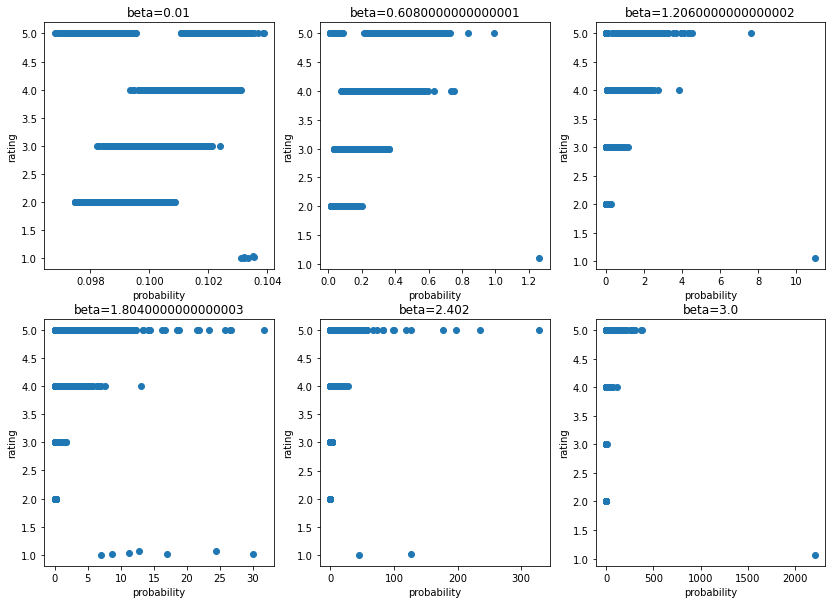

In [3]:
fig, axs = plt.subplots(2, 3, figsize=(14, 10))
for i in range(6):
    axs[i // 3, i % 3].scatter(results[i][0].flatten(), results[i][1].flatten(), linestyle='None')
    axs[i // 3, i % 3].set(xlabel='probability',
                           ylabel='rating', title=f'beta={beta[i]}')
fig.show()

In [4]:
truth = generate_ground_truth_matrix(
    (1000, 1000), environment='latent-static-v1')
users, items, ratings, P, R, R_no_noise = ground_truth_matrix_to_dataset(
    truth, quantization='binary', bias='full underlying')
train_df = to_dataframe(ratings)

In [5]:
reader = Reader(rating_scale=(1, 2))
data = Dataset.load_from_df(train_df[['userID', 'itemID', 'rating']], reader)
trainset = data.build_full_trainset()

knn = KNNBasic()
svd = SVD()

knn.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [6]:
test_df = generate_test_dataframe(R)
testset = Dataset.load_from_df(test_df[['userID', 'itemID', 'rating']], reader).build_full_trainset().build_testset()
predictions = knn.test(testset)
accuracy.rmse(predictions)

RMSE: 0.7026


0.702618978109243

In [24]:
beta = np.linspace(0.1, 5, 30)
result = []

for i in range(len(beta)):
    truth = generate_ground_truth_matrix(
        (1000, 1000), environment='latent-static-v1')
    users, items, ratings, P, R, R_no_noise = ground_truth_matrix_to_dataset(
        truth, quantization='onetofive', bias='full underlying', beta=beta[i])
    train_df = to_dataframe(ratings)

    reader = Reader(rating_scale=(1, 5))
    data = Dataset.load_from_df(train_df[['userID', 'itemID', 'rating']], reader)
    trainset = data.build_full_trainset()

    knn = KNNBasic()
    knn.fit(trainset)

    test_df = generate_test_dataframe(R_no_noise)
    testset = Dataset.load_from_df(test_df[['userID', 'itemID', 'rating']], reader).build_full_trainset().build_testset()
    predictions = knn.test(testset)
    result.append(accuracy.mae(predictions) / 5)

result_5 = result

result = []

for i in range(len(beta)):
    truth = generate_ground_truth_matrix(
        (1000, 1000), environment='latent-static-v1')
    users, items, ratings, P, R, R_no_noise = ground_truth_matrix_to_dataset(
        truth, quantization='onetothree', bias='full underlying', beta=beta[i])
    train_df = to_dataframe(ratings)

    reader = Reader(rating_scale=(1, 3))
    data = Dataset.load_from_df(
        train_df[['userID', 'itemID', 'rating']], reader)
    trainset = data.build_full_trainset()

    knn = KNNBasic()
    knn.fit(trainset)

    test_df = generate_test_dataframe(R_no_noise)
    testset = Dataset.load_from_df(
        test_df[['userID', 'itemID', 'rating']], reader).build_full_trainset().build_testset()
    predictions = knn.test(testset)
    result.append(accuracy.mae(predictions) / 3)

result_3 = result

result = []

for i in range(len(beta)):
    truth = generate_ground_truth_matrix(
        (1000, 1000), environment='latent-static-v1')
    users, items, ratings, P, R, R_no_noise = ground_truth_matrix_to_dataset(
        truth, quantization='onetoten', bias='full underlying', beta=beta[i])
    train_df = to_dataframe(ratings)

    reader = Reader(rating_scale=(1, 10))
    data = Dataset.load_from_df(
        train_df[['userID', 'itemID', 'rating']], reader)
    trainset = data.build_full_trainset()

    knn = KNNBasic()
    knn.fit(trainset)

    test_df = generate_test_dataframe(R_no_noise)
    testset = Dataset.load_from_df(
        test_df[['userID', 'itemID', 'rating']], reader).build_full_trainset().build_testset()
    predictions = knn.test(testset)
    result.append(accuracy.mae(predictions) / 10)

result_10 = result


Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.4092
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.3864
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.4132
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.4272
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.4579
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.4950
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.4858
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.5418
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.5940
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.6300
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.6942
Computing the msd similarity matrix...
Done computing 

In [35]:
result = []

for i in range(len(beta)):
    truth = generate_ground_truth_matrix(
        (1000, 1000), environment='latent-static-v1')
    users, items, ratings, P, R, R_no_noise = ground_truth_matrix_to_dataset(
        truth, quantization='binary', bias='full underlying', beta=beta[i])
    train_df = to_dataframe(ratings)

    reader = Reader(rating_scale=(1, 2))
    data = Dataset.load_from_df(
        train_df[['userID', 'itemID', 'rating']], reader)
    trainset = data.build_full_trainset()

    knn = KNNBasic()
    knn.fit(trainset)

    test_df = generate_test_dataframe(R_no_noise)
    testset = Dataset.load_from_df(
        test_df[['userID', 'itemID', 'rating']], reader).build_full_trainset().build_testset()
    predictions = knn.test(testset)
    result.append(accuracy.mae(predictions) / 2)

result_2 = result


Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.4151
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.5421
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.4889
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.5346
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.4709
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.5382
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.4872
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.5787
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.4754
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.4412
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.4236
Computing the msd similarity matrix...
Done computing 

/var/folders/p2/v6y91c591nq_2q129bwd64bc0000gn/T/ipykernel_10308/4289088726.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


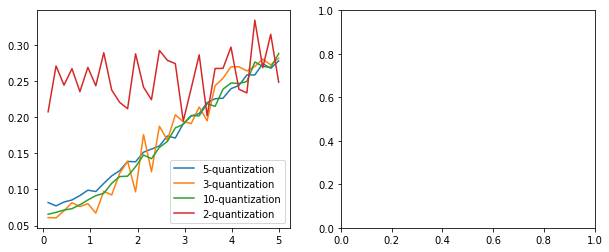

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(beta, result_5, label='5-quantization')
axs[0].plot(beta, result_3, label='3-quantization')
axs[0].plot(beta, result_10, label='10-quantization')
axs[0].plot(beta, result_2, label='2-quantization')
axs[0].legend()
fig.show()